In [1]:
import utils
import warnings
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

global companies_set 

warnings.filterwarnings('ignore')

# EDA - BT

In [2]:
path = r"D:\Documentos_D\UFCG\2021.2e\TCC\Project\analise-de-indicador-tcc-ufcg\Data\indicadores_Siteware.csv"
companies_set = utils.prepare_datasets(path)

Informações básicas do conjunto de indicadores:
Empresas:  ['BC' 'BI' 'BR' 'BT']
Canais:  ['NaN' 'ME' 'EE' 'MI']
Mercado:  ['NaN' 'R1' 'R2' 'R3' 'R4' 'R5' 'R6']

Obs: Os canais e mercados que são 'NaN' serão desconsiderados.


Qtd
Canal_Distribuicao Mercado     
ME                 NaN      121
                   R1       193
NaN                NaN      121

Qtd
Canal_Distribuicao Mercado     
ME                 NaN      121
                   R2       193
                   R3       193
                   R5        65
NaN                NaN      121

Qtd
Canal_Distribuicao Mercado     
EE                 NaN      121
                   R1       144
                   R2       193
                   R3       145
                   R4       131
                   R5       168
ME                 NaN      121
MI                 R6       169
NaN                NaN      121

Qtd
Canal_Distribuicao Mercado     
ME                 NaN      103
                   R2       173
                   R4       127
                   R5       151
NaN                NaN      103

# 2 - Análise Exploratória dos Dados

#### - Canal de Distribuição: ME

##### --- Mercado: *R2*

In [3]:
company = companies_set[3][0]
channel = 'ME'
market = 'R2'

cmp_df_r2 = companies_set[3][1].reset_index().drop(['index'],axis=1)
cmp_df_r2 = cmp_df_r2[((cmp_df_r2.Canal_Distribuicao == channel) & (cmp_df_r2.Mercado == market))]
cmp_df_r2 = cmp_df_r2[((cmp_df_r2.Empresa != "NaN") & (cmp_df_r2.Canal_Distribuicao != "NaN") & (cmp_df_r2.Mercado != "NaN"))]
cmp_df_r2 = cmp_df_r2.sort_values(by='Volume_Venda').reset_index().drop(['index'],axis=1)
cmp_df_r2 = cmp_df_r2.drop_duplicates('Data',keep='last').sort_values(by='Data').reset_index().drop(['index'],axis=1)

print("Início dos dados:")
display(cmp_df_r2.head(1))
print("Fim dos dados:")
display(cmp_df_r2.tail(1))

means_bt_me_r2 = []
year = 2012
while year < 2021:
    query = cmp_df_r2[((cmp_df_r2.Data >= str(year)) & (cmp_df_r2.Data < str(year+1)))]
    query['Volume_Venda'] = query['Volume_Venda'].astype(float)
    
    mean = np.round(query['Volume_Venda'].mean(),4)
    boxplot = query.boxplot(column = ['Volume_Venda'])
    
    save_path = r"D:\Documentos_D\UFCG\2021.2e\TCC\graficos\boxplot" + "\\" + company + "\\" + channel +"_" + market  + "_" + str(year) + ".png"
    plt.title(company + " - " + channel + " - " + market + " - " + str(year))
    plt.savefig(save_path)
    plt.close()
    
    means_bt_me_r2.append(mean)
    year += 1

means = means_bt_me_r2
bars = ['2012','2013','2014','2015','2016','2017','2018','2019','2020']
y_pos = np.arange(len(bars))
plt.title("Média do Volume de Vendas/ano | "+ companies_set[3][0]+" - ME - R2")
plt.plot(y_pos, means)
plt.xticks(y_pos, bars)

save_path = r"D:\Documentos_D\UFCG\2021.2e\TCC\graficos\media" + "\\" + company + "\\" + channel + "_" + market + "_media" ".png"
plt.savefig(save_path)

plt.close()

Início dos dados:


,Empresa,Canal_Distribuicao,Mercado,Volume_Venda,Data
0,BT,ME,R2,4214.0,2012-01-01 00:00:00.000


Fim dos dados:


,Empresa,Canal_Distribuicao,Mercado,Volume_Venda,Data
102,BT,ME,R2,0.0,2020-07-01 00:00:00.000


##### --- Mercado: *R4*

In [4]:
company = companies_set[3][0]
channel = 'ME'
market = 'R4'

cmp_df_r4 = companies_set[3][1].reset_index().drop(['index'],axis=1)
cmp_df_r4 = cmp_df_r4[((cmp_df_r4.Canal_Distribuicao == channel) & (cmp_df_r4.Mercado == market))] # só vai ate 07/2020
cmp_df_r4 = cmp_df_r4[((cmp_df_r4.Empresa != "NaN") & (cmp_df_r4.Canal_Distribuicao != "NaN") & (cmp_df_r4.Mercado != "NaN"))]
cmp_df_r4 = cmp_df_r4.sort_values(by='Volume_Venda').reset_index().drop(['index'],axis=1)
cmp_df_r4 = cmp_df_r4.drop_duplicates('Data',keep='last').sort_values(by='Data').reset_index().drop(['index'],axis=1)

print("Início dos dados:")
display(cmp_df_r4.head(1))
print("Fim dos dados:")
display(cmp_df_r4.tail(1))

means_bt_me_r4 = []
year = 2012
while year < 2021:
    query = cmp_df_r4[((cmp_df_r4.Data >= str(year)) & (cmp_df_r4.Data < str(year+1)))]
    query['Volume_Venda'] = query['Volume_Venda'].astype(float)
    
    mean = np.round(query['Volume_Venda'].mean(),4)
    boxplot = query.boxplot(column = ['Volume_Venda'])
    
    save_path = r"D:\Documentos_D\UFCG\2021.2e\TCC\graficos\boxplot" + "\\" + company + "\\" + channel +"_" + market  + "_" + str(year) + ".png"
    plt.title(company + " - " + channel + " - " + market + " - " + str(year))
    plt.savefig(save_path)
    plt.close()
    
    means_bt_me_r4.append(mean)
    year += 1

means = means_bt_me_r4
bars = ['2012','2013','2014','2015','2016','2017','2018','2019','2020']
y_pos = np.arange(len(bars))

plt.title("Média do Volume de Vendas/ano | "+ companies_set[3][0]+" - ME - R4")
plt.plot(y_pos, means)
plt.xticks(y_pos, bars)

save_path = r"D:\Documentos_D\UFCG\2021.2e\TCC\graficos\media" + "\\" + company + "\\" + channel + "_" + market + "_media" ".png"
plt.savefig(save_path)

plt.close()

Início dos dados:


,Empresa,Canal_Distribuicao,Mercado,Volume_Venda,Data
0,BT,ME,R4,1014.0,2012-01-01 00:00:00.000


Fim dos dados:


,Empresa,Canal_Distribuicao,Mercado,Volume_Venda,Data
102,BT,ME,R4,0.0,2020-07-01 00:00:00.000


##### --- Mercado: *R5*

In [5]:
company = companies_set[3][0]
channel = 'ME'
market = 'R5'

cmp_df_r5 = companies_set[3][1].reset_index().drop(['index'],axis=1)
cmp_df_r5 = cmp_df_r5[((cmp_df_r5.Canal_Distribuicao == channel) & (cmp_df_r5.Mercado == market))] # só vai ate 07/2020
cmp_df_r5 = cmp_df_r5[((cmp_df_r5.Empresa != "NaN") & (cmp_df_r5.Canal_Distribuicao != "NaN") & (cmp_df_r5.Mercado != "NaN"))]
cmp_df_r5 = cmp_df_r5.sort_values(by='Volume_Venda').reset_index().drop(['index'],axis=1)
cmp_df_r5 = cmp_df_r5.drop_duplicates('Data',keep='last').sort_values(by='Data').reset_index().drop(['index'],axis=1)

print("Início dos dados:")
display(cmp_df_r5.head(1))
print("Fim dos dados:")
display(cmp_df_r5.tail(1))

means_bt_me_r5 = []
year = 2012
while year < 2021:
    query = cmp_df_r5[((cmp_df_r5.Data >= str(year)) & (cmp_df_r5.Data < str(year+1)))]
    query['Volume_Venda'] = query['Volume_Venda'].astype(float)
    
    mean = np.round(query['Volume_Venda'].mean(),4)
    boxplot = query.boxplot(column = ['Volume_Venda'])
    
    save_path = r"D:\Documentos_D\UFCG\2021.2e\TCC\graficos\boxplot" + "\\" + company + "\\" + channel +"_" + market  + "_" + str(year) + ".png"
    plt.title(company + " - " + channel + " - " + market + " - " + str(year))
    plt.savefig(save_path)
    plt.close()
    
    means_bt_me_r5.append(mean)
    year += 1

means = means_bt_me_r5
bars = ['2012','2013','2014','2015','2016','2017','2018','2019','2020']
y_pos = np.arange(len(bars))

plt.title("Média do Volume de Vendas/ano | "+ companies_set[3][0]+" - ME - R5")
plt.plot(y_pos, means)
plt.xticks(y_pos, bars)

save_path = r"D:\Documentos_D\UFCG\2021.2e\TCC\graficos\media" + "\\" + company + "\\" + channel + "_" + market + "_media" ".png"
plt.savefig(save_path)

plt.close()

Início dos dados:


,Empresa,Canal_Distribuicao,Mercado,Volume_Venda,Data
0,BT,ME,R5,18864.0,2012-01-01 00:00:00.000


Fim dos dados:


,Empresa,Canal_Distribuicao,Mercado,Volume_Venda,Data
102,BT,ME,R5,0.0,2020-07-01 00:00:00.000


##### - *Correlação ME X R2 X R4 X R5*

NameError: name 'sns' is not defined

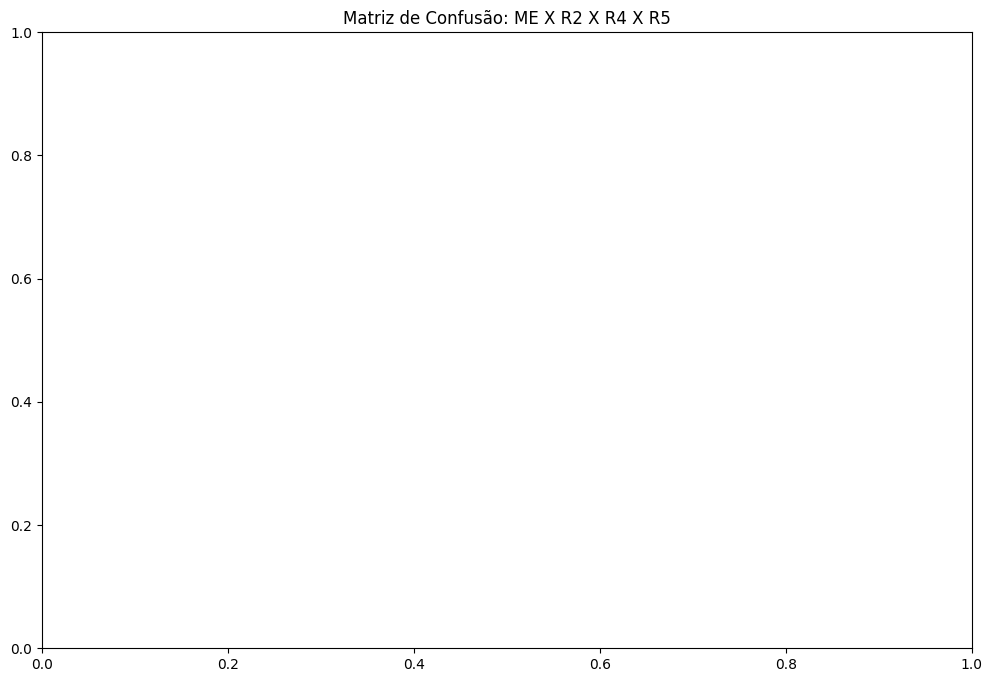

In [6]:
cmp_df = companies_set[3][1].reset_index().drop(['index'],axis=1)
cmp_df = cmp_df[((cmp_df.Empresa != "NaN") & (cmp_df.Canal_Distribuicao != "NaN") & (cmp_df.Mercado == "NaN"))]
cmp_df = cmp_df.sort_values(by='Volume_Venda').reset_index().drop(['index'],axis=1)
cmp_df = cmp_df.drop_duplicates('Data',keep='last').sort_values(by='Data').reset_index().drop(['index'],axis=1)

new_df = pd.DataFrame()
new_df['Volume_Venda_R2'] = cmp_df_r2['Volume_Venda']
new_df['Volume_Venda_R4'] = cmp_df_r4['Volume_Venda']
new_df['Volume_Venda_R5'] = cmp_df_r5['Volume_Venda']
new_df['Volume_Venda_ME'] = cmp_df['Volume_Venda']
new_df['Data'] = cmp_df['Data']
new_df = new_df[((new_df.Volume_Venda_R2 != 0) | (new_df.Volume_Venda_R4 != 0) | (new_df.Volume_Venda_R5 != 0) |
                (new_df.Volume_Venda_ME != 0))]
new_df = new_df.drop(['Data'],axis=1)
new_df = new_df.astype(float)

plt.figure(figsize = (12, 8))
plt.title("Matriz de Confusão: ME X R2 X R4 X R5")
sns.heatmap(new_df.corr())

save_path = r"D:\Documentos_D\UFCG\2021.2e\TCC\graficos\correlacao" + "\\" + company + "\\" + channel + "_" + "_matriz_de_confusao" ".png"
plt.savefig(save_path)

plt.close()